Monte Carlo Simulations

Source: Monte Carlo Tutorial: Calculating Pi

https://www.kaggle.com/nickgould/monte-carlo-tutorial-calculating-pi

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PlotWidth = 8

In [3]:
def MonteCarloPi(numDataPoints, numCirclePoints = 360, numDecimalPoints = 4):
#Draw a square and a circle to frame out simulation
    squareX = [1,-1,-1,1,1]
    squareY = [1,1,-1,-1,1]
    
    circleX = (np.cos(np.pi*np.arange(numCirclePoints+1)/180))
    circleY = (np.sin(np.pi*np.arange(numCirclePoints+1)/180))

#Generate a bunch of values of x and y between -1 and 1, then assess their combined radius on an xy plane
    dfMonteCarloPi = pd.DataFrame(columns=['x', 'y', 'r', 'Location', 'CurrentPi'])
    dfMonteCarloPi['x'] = 2*(np.random.rand(numDataPoints)-0.5)
    dfMonteCarloPi['y'] = 2*(np.random.rand(numDataPoints)-0.5)
    dfMonteCarloPi['r'] = np.sqrt(dfMonteCarloPi['x']**2 + dfMonteCarloPi['y']**2)
    dfMonteCarloPi.loc[dfMonteCarloPi['r'] <= 1, 'Location'] = 'Inside'
    dfMonteCarloPi.loc[dfMonteCarloPi['r'] > 1, 'Location'] = 'Outside'
    #inside / total = pi / 4
    dfMonteCarloPi['CurrentPi'] = 4*(dfMonteCarloPi['Location'] == 'Inside').cumsum()/(dfMonteCarloPi.index-1)
    
    piValue = np.round(np.array(dfMonteCarloPi['CurrentPi'])[-1], numDecimalPoints)
    piError = np.round(round(100*((piValue-np.pi)/np.pi),4), numDecimalPoints)

#Draw a 2D plot of where our iterations landed compared to the square and circle
    plt.figure(figsize=(PlotWidth,PlotWidth))
    plt.plot(squareX,squareY,color='#000000')
    plt.plot(circleX,circleY,color='#0000CC')
    sns.scatterplot(x='x', y='y', data=dfMonteCarloPi, hue='Location', palette='colorblind')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(bbox_to_anchor=(0,-.08), loc="upper left")
    plt.title('Locations of randomly drawn points')
    plt.show()
    
#Draw a psuedo-time series plot of current estimate of pi vs. iteration number
    plt.figure(figsize=(PlotWidth,PlotWidth))
    plt.plot(dfMonteCarloPi.index+1,dfMonteCarloPi['CurrentPi'],color='#009900')
    plt.axhline(y=np.pi,color='#0F0F0F',ls='--')
    plt.xlim(0,numDataPoints+1)
    plt.ylim(0,4)
    plt.xlabel('Iteration Number')
    plt.ylabel('Estimate for pi')
    plt.title('Current estimate for pi by iteration number')
    plt.show()

#print out our final estimate and how it compares to the true value
    print('\n' + f'Pi is approximately {piValue}\n')
    print(f'This is {piError}% off the true value.\n')
#     return dfMonteCarloPi

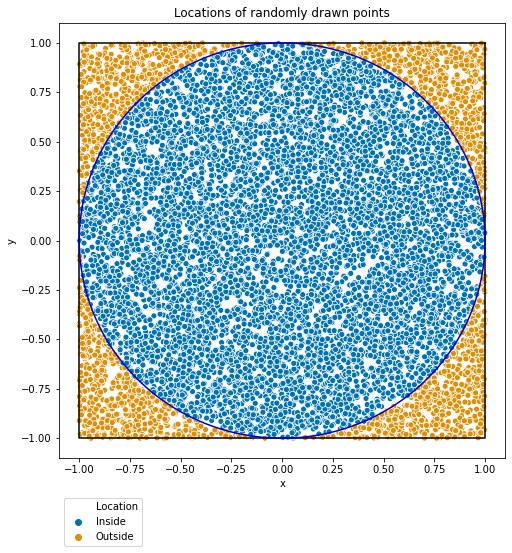

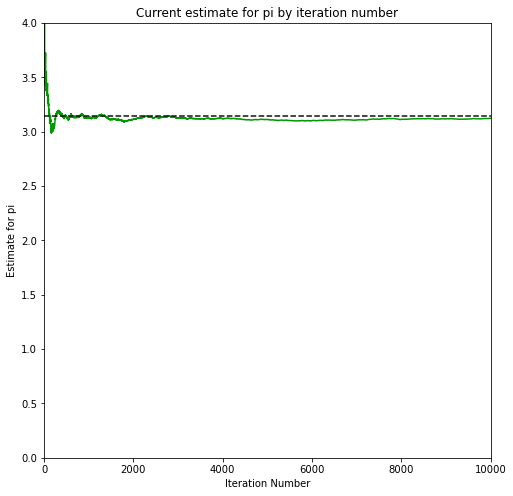


Pi is approximately 3.1226

This is -0.6046% off the true value.



In [7]:
MonteCarloPi(10000)